In [237]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

# ASK Modulation

### Generate and plot random binary sequence

In [238]:
# N = np.random.randint(20)
np.random.seed(42)
N = 50
x = np.random.randint(2, size=N)
Tb = 0.001 #symbol duration
nb = 100   #number of bit per symbol

In [239]:
def zeros(nb):
    return np.zeros(nb, dtype=int)


def ones(nb):
    return np.ones(nb, dtype=int)

In [240]:
digit = np.empty(0, dtype=int)
for i in range(N):
    if x[i] == 0:
        digit = np.append(digit, zeros(nb))
    elif x[i] == 1:
        digit = np.append(digit, ones(nb))

Input Signal: 
 [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1]


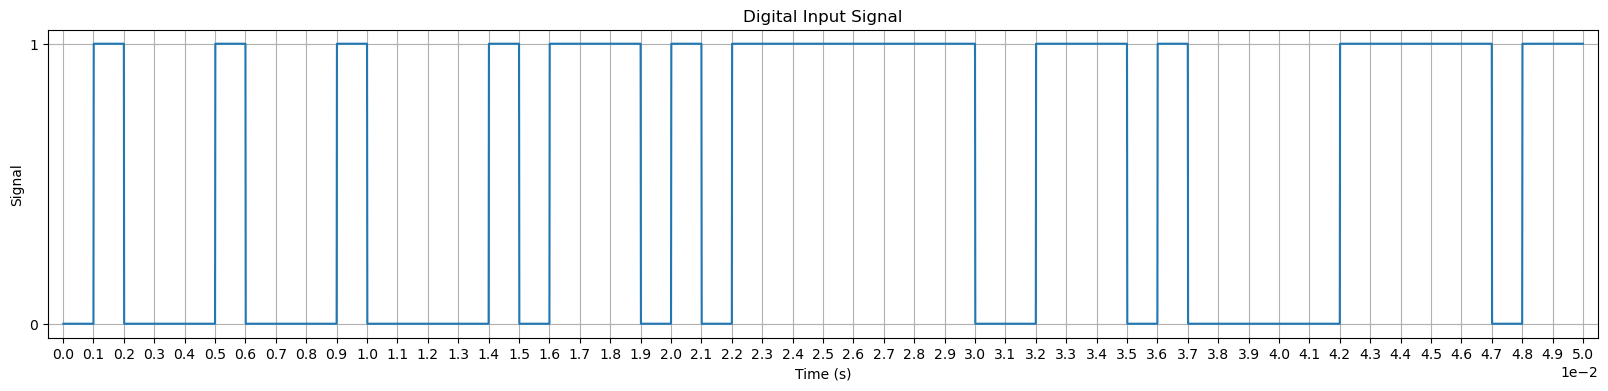

In [241]:
t1 = np.linspace(Tb / nb, N * Tb, nb * N)
plt.figure(figsize=(20,4))
plt.plot(t1, digit)
plt.xticks(np.linspace(0, N * Tb, N + 1))
plt.yticks([0, 1])
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('Digital Input Signal')
plt.margins(x=0.01, y=0.05)
plt.grid()
print('Input Signal: \n', x)

### Generate and plot carrier signal

In [242]:
Ac0 = 1
Ac1 = 1.5

Rb = 1 / Tb # 1kbps
Fc = Rb * 2 # carrier frequency (should be >> Rb)
# t2 = np.linspace(Tb / nb, Tb, nb)

t = Tb*np.arange(0,N,1/nb)
c0 = np.cos(2 * np.pi * Fc * t, dtype=float) * Ac0
c1 = np.cos(2 * np.pi * Fc * t, dtype=float) * Ac1


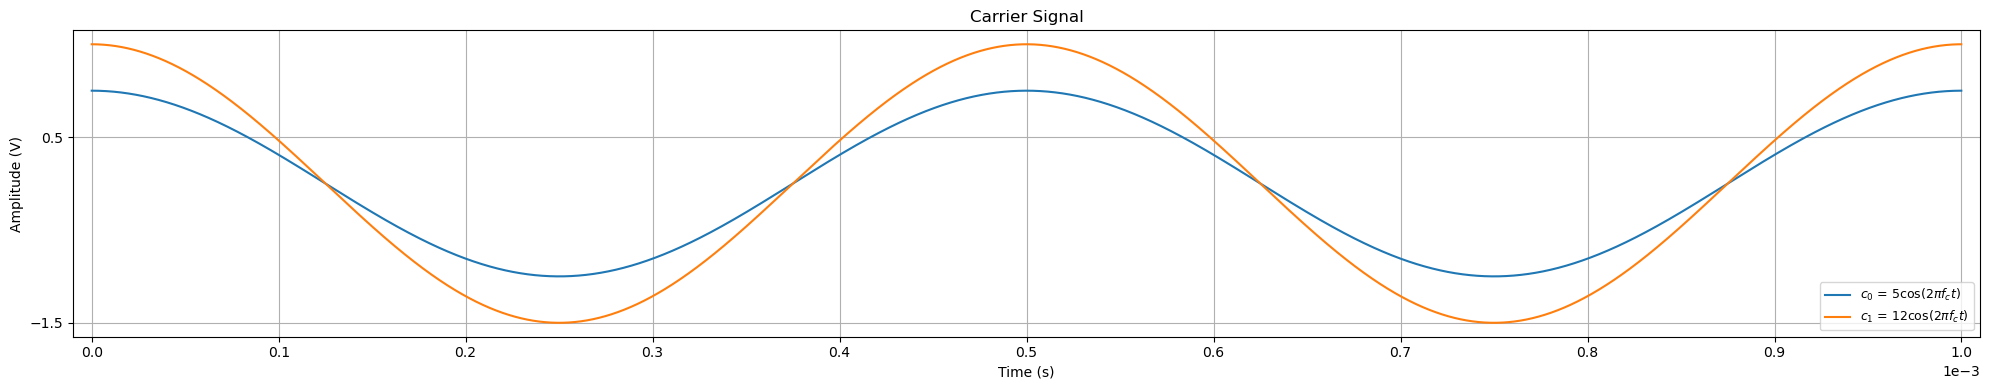

In [243]:
plt.figure(figsize=(20,4))
t_ = Tb * np.arange(0,1,1/10000)
plt.plot(t_, np.cos(2 * np.pi * Fc * t_, dtype=float) * Ac0)
plt.plot(t_, np.cos(2 * np.pi * Fc * t_, dtype=float) * Ac1)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.xticks(np.linspace(0, Tb, 11))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.yticks(np.arange(-Ac1,Ac1 + 1,2))
plt.grid(True)
plt.title('Carrier Signal')
plt.legend(['$c_0$ = $5\cos(2\pi f_ct)$','$c_1$ = $12\cos(2\pi f_ct)$'], loc='lower right', fontsize=9)
plt.margins(x=0.01, y=0.05)
plt.tight_layout()

### Peform ASK modulation and plot the modulated signal

In [244]:
# mod = np.empty(0, dtype=float)
# for i in range(N):
#     if x[i] == 1:
#         y = np.cos(2 * np.pi * Fc * t2, dtype=float) * Ac1
#     else:
#         y = np.cos(2 * np.pi * Fc * t2, dtype=float) * Ac0
#     mod = np.append(mod, y)
mod = np.where(digit==0, c0, digit*c1)

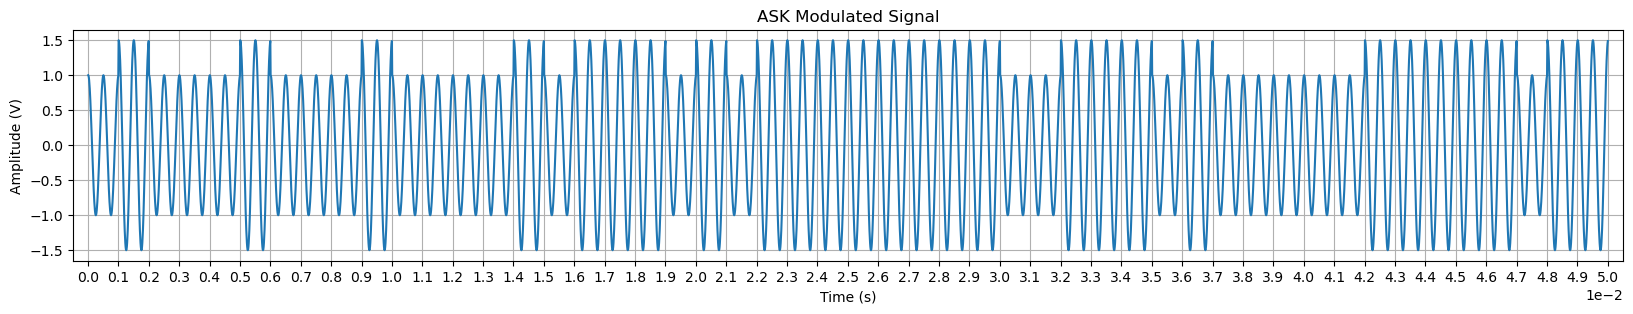

In [245]:
t3 = np.linspace(Tb / nb, Tb * N, N * nb)
plt.figure(figsize=(20,3))
plt.plot(t3, mod)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xticks(np.linspace(0, N * Tb, N + 1))
plt.yticks()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('ASK Modulated Signal')
plt.margins(x=0.01, y=0.05)
plt.grid()

# ASK Demodulation

In [246]:
def demodulate(mod, c0, c1, nb):
    n = int(len(mod) / nb)
    demod=np.empty(shape=n, dtype=int)
    for i in range(0, n*nb, nb):
        I0 = np.trapz(mod[i:i+nb]*c0[i:i+nb])
        e0 = np.sum(c0[i:i+nb]**2)
        I1 = np.trapz(mod[i:i+nb]*c1[i:i+nb])
        e1 = np.sum(c1[i:i+nb]**2)
        if I0 - 1/2*e0 > I1 - 1/2*e1:
            demod[np.floor(i/nb).astype('int')] = 0
        else:
            demod[np.floor(i/nb).astype('int')] = 1
    return demod

## Without noise

In [247]:
demod = demodulate(mod, c0, c1, nb)

In [248]:
digit = np.empty(0, dtype=int)
for sig in demod:
    if sig == 0:
        digit = np.append(digit, zeros(nb))
    elif sig == 1:
        digit = np.append(digit, ones(nb))

Demodulated Signal: 
 [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1]


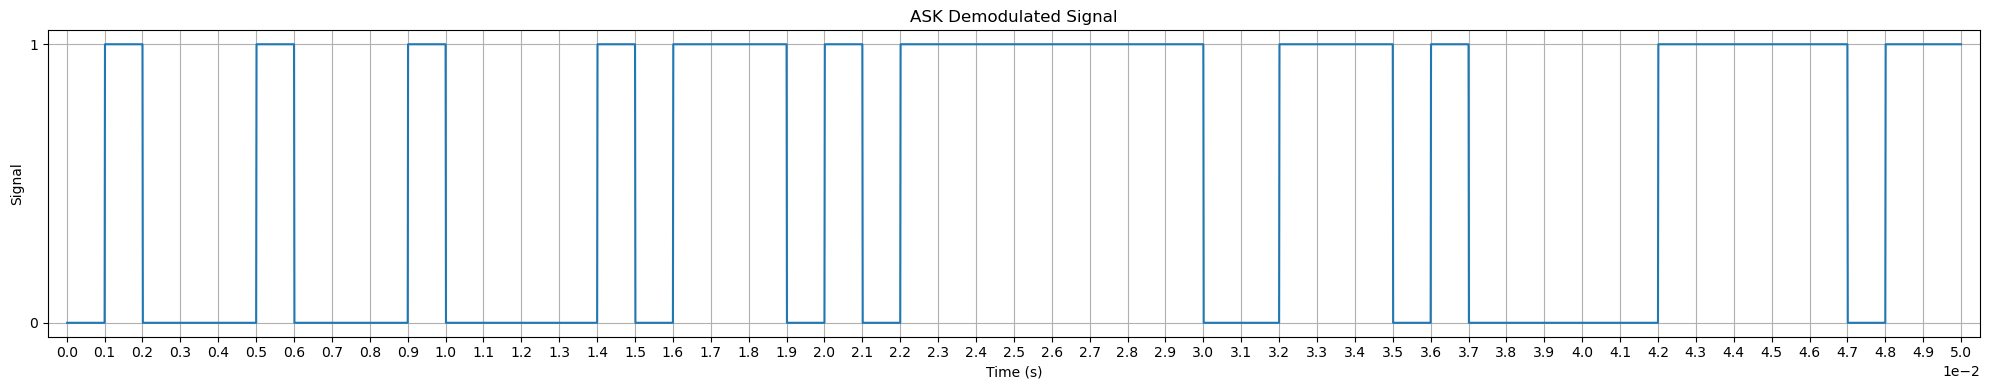

In [249]:
t5 = np.linspace(Tb / nb, nb * len(demod) * (Tb / nb), nb * len(demod))
plt.figure(figsize=(20,4))
plt.plot(t5, digit)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.xticks(np.linspace(0, N * Tb, N + 1))
plt.yticks([0, 1])
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('ASK Demodulated Signal')
plt.margins(x=0.01, y=0.05)
plt.grid()

print('Demodulated Signal: \n', demod)
plt.tight_layout()

## With AWGN

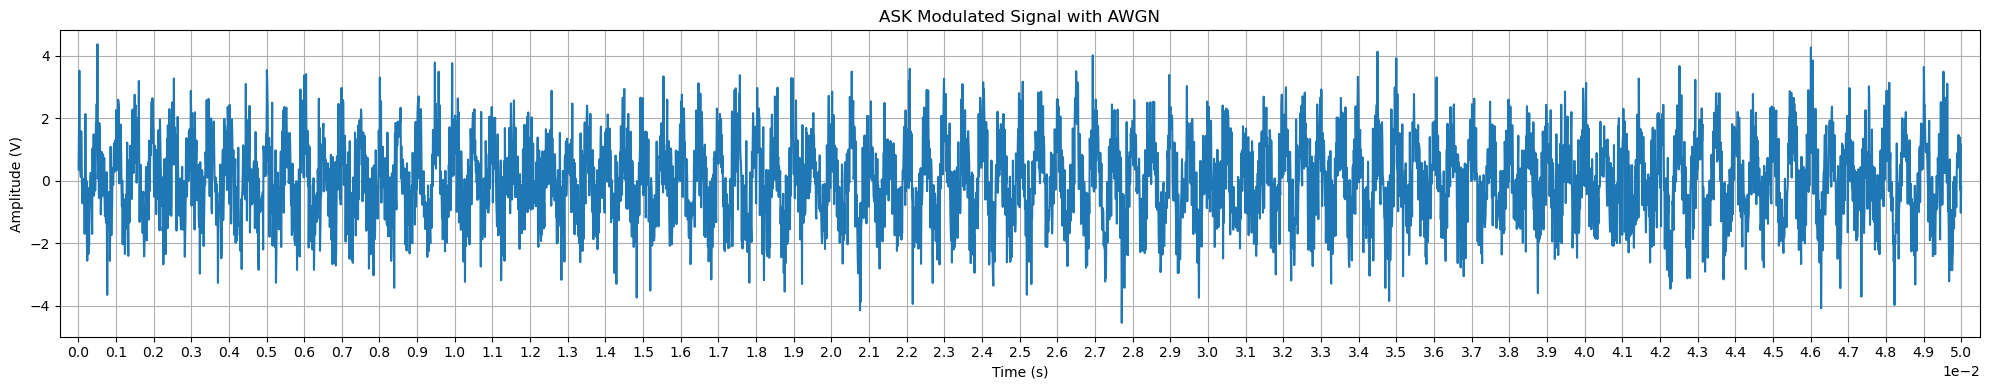

In [250]:
# add Gaussian noise with zero mean and variance N0/2 to the transmitted waveform
mean = 0
# standard_deviation = np.sqrt(N0/2)
standard_deviation = 1
noise = np.random.normal(mean, standard_deviation, len(mod))
mod_noise = mod + noise

plt.figure(figsize=(20,4))
plt.plot(t3, mod_noise)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xticks(np.linspace(0, N * Tb, N + 1))
plt.yticks()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('ASK Modulated Signal with AWGN')
plt.margins(x=0.01, y=0.05)
plt.grid()
plt.tight_layout()

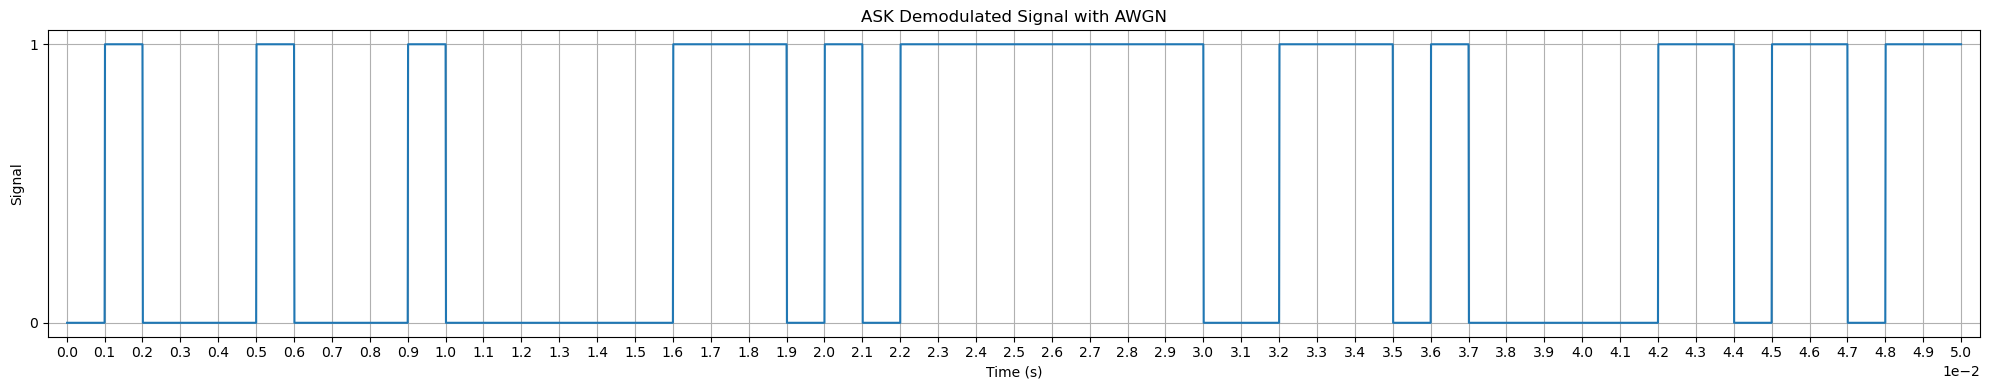

In [251]:
demod_noise = demodulate(mod_noise, c0, c1, nb)
# plot the demodulated signal
digit = np.empty(0, dtype=int)
for sig in demod_noise:
    if sig == 0:
        digit = np.append(digit, zeros(nb))
    elif sig == 1:
        digit = np.append(digit, ones(nb))

t5 = np.linspace(Tb / nb, nb * len(demod_noise) * (Tb / nb), nb * len(demod_noise))
plt.figure(figsize=(20,4))
plt.plot(t5, digit)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.xticks(np.linspace(0, N * Tb, N + 1))
plt.yticks([0, 1])
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('ASK Demodulated Signal with AWGN')
plt.grid()
plt.margins(x=0.01, y=0.05)

plt.tight_layout()


In [252]:
error_bits = np.count_nonzero(demod_noise - x)
Pb = error_bits / len(x) * 100
print(f"Bit Error Probability: {Pb}%")

Bit Error Probability: 4.0%


In [253]:
# s = len(t2)
#
# demod = np.empty(0, dtype=int)
#
# for i in np.linspace(s, len(y), int(len(y) / s), dtype=int):
#     t4 = np.linspace(Tb / nb, Tb, nb)
#     c = np.cos(2 * np.pi * Fc * t4)
#     mm = np.multiply(y[i - s:i], c)  # i-s+1 -> i
#     t5 = np.linspace(Tb / nb, Tb, nb)
#     z = np.trapz(mm, t5, axis=0)
#     rz = np.round(2 * z / Tb)
#     Ac = (Ac1 + Ac0) / 2
#     if rz > Ac:
#         demod = np.append(demod, 1)
#     else:
#         demod = np.append(demod, 0)

In [254]:
# x = mod
#
# h = 1
# w = 0
#
# y = np.convolve(h, x) + w